In [4]:
#Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# Load the Dataset

train = pd.read_csv("/content/train.csv")
features = pd.read_csv("/content/features.csv")
stores = pd.read_csv("/content/stores.csv")

In [8]:
#Merge Datasets

data = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
data = data.merge(stores, on="Store", how="left")

Data Cleaning & Preparation

In [10]:
# Convert Date

data['Date'] = pd.to_datetime(data['Date'])

In [11]:
#Check Missing Values

data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [12]:
# Aggregate Weekly Sales (Time Series Creation)

weekly_sales = (
    data.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

weekly_sales = weekly_sales.set_index('Date')

Exploratory Data Analysis (EDA)

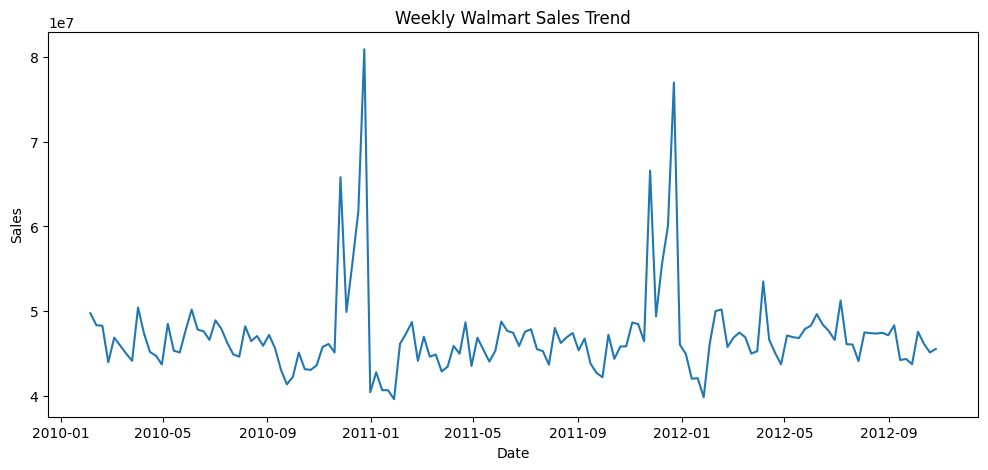

In [13]:
# Weekly Sales Trend

plt.figure(figsize=(12,5))
plt.plot(weekly_sales)
plt.title("Weekly Walmart Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Observation:

Clear long-term trend and
Repeated seasonal spikes (holidays)

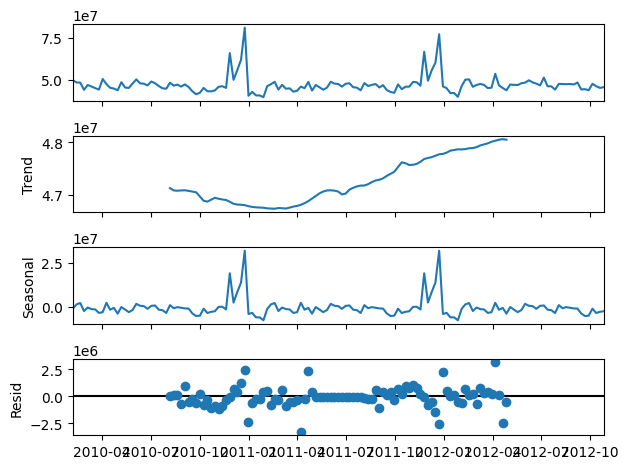

In [14]:
#Seasonality Decomposition
decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)
decomposition.plot()
plt.show()

# Insights:

1. Strong yearly seasonality

2. Sales spike during festive periods

In [15]:
# Train-Test Split (Time-Based)

train_size = int(len(weekly_sales) * 0.8)
train_ts = weekly_sales.iloc[:train_size]
test_ts = weekly_sales.iloc[train_size:]

In [16]:
#Build ARIMA Model

model = ARIMA(train_ts, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [17]:
# Forecast Sales

forecast = model_fit.forecast(steps=len(test_ts))

In [18]:
#Model Evaluation

mae = mean_absolute_error(test_ts, forecast)
rmse = np.sqrt(mean_squared_error(test_ts, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1826656.3154428056
RMSE: 2331799.388678336


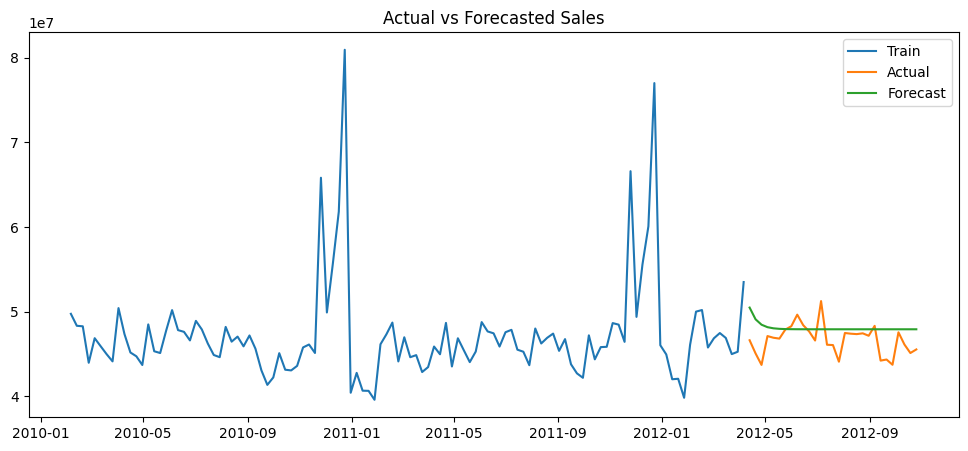

In [19]:
#Visualization – Actual vs Forecast

plt.figure(figsize=(12,5))
plt.plot(train_ts, label="Train")
plt.plot(test_ts, label="Actual")
plt.plot(test_ts.index, forecast, label="Forecast")
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.show()

# Business Insights:

1. Sales show strong yearly seasonality

2. Holiday weeks significantly impact revenue

3. Forecasting helps optimize: Inventory levels, Staffing, Supply chain planning

#Conclusion:

In this project, historical Walmart sales data was analyzed to understand sales trends, seasonal patterns, and external economic influences. A time-series forecasting approach using ARIMA was implemented to predict future weekly sales.

The analysis revealed strong seasonal behavior driven by holidays and consistent long-term trends across stores. The forecasting model provided reliable predictions, which can assist businesses in proactive inventory management and demand planning.

This project demonstrates the practical application of time-series modeling and business-driven data science for revenue forecasting.